In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from src.experiments import compare_guarantees_experiment
from src.experiments import bargaining_gap_experiment
from src.experiments import total_surplus_experiment

# settings

In [2]:
NUMBER_OF_EXPERIMENTS = 100
PRECISION = 10 # 6 decimal places

In [3]:
def calc_raios(data, metric_cols, all_cols, group_cols):
    ratios = pd.DataFrame()
    for g in metric_cols:
        for gd in all_cols:
            if g == gd:
                continue

            ratios[f'{g}/{gd}'] = data[g]/data[gd]
    
    for gc in group_cols:
        ratios[gc] = data[gc]

    return ratios

# 1. Comparing guarantees

In [4]:
cg_exp = compare_guarantees_experiment.CompareGuaranteeExperiment()
cg_exp.run_and_save(NUMBER_OF_EXPERIMENTS)
cg_exp.columns

{'dc_gr',
 'familiar_share_gr',
 'goods_num',
 'max_min_gr',
 'min_max_gr',
 'sb_gr',
 'utility_type'}

In [5]:
data = cg_exp.load_experiment()

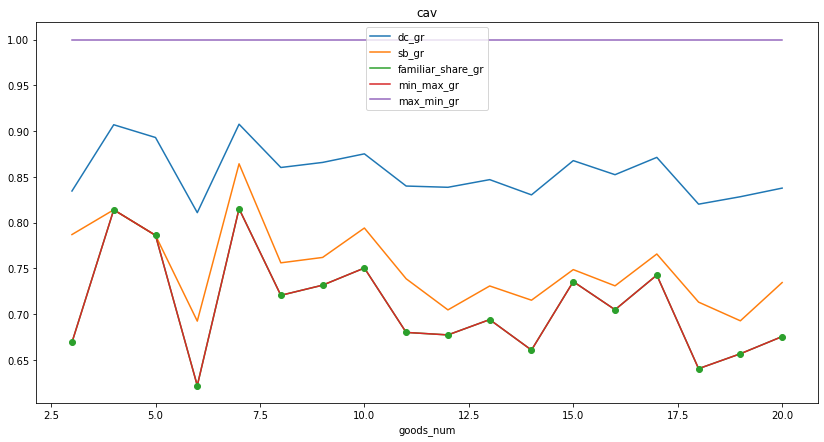

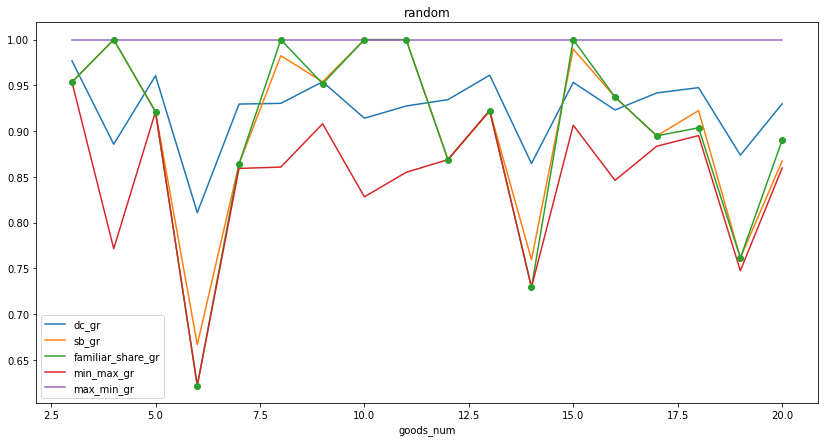

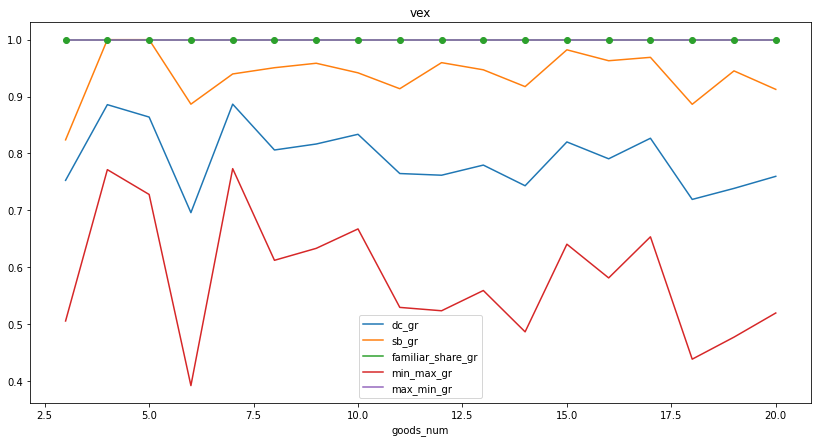

In [36]:
r_data = data.groupby(['utility_type', 'goods_num']).first()
for i in r_data.index.unique('utility_type'):
    gr = r_data.loc[i].plot(figsize=(14, 7), title=i, style='-')
    [line] = [l for l in gr.get_lines() if l.get_label() == 'familiar_share_gr']
    r_data.loc[i]['familiar_share_gr'].plot(style='o', color=line.get_color())

as seen from the graph all guarantees values lies beetween min_max and max_min guarantees. </br>
now i will try to find experiment where this condition violates

In [37]:
guarantees_columns = [
    'dc_gr',
    'familiar_share_gr',
    'max_min_gr',
    'min_max_gr',
    'sb_gr',
]

data[data['min_max_gr'].round(PRECISION) > data[guarantees_columns].min(axis=1).round(PRECISION)]

Empty DataFrame
Columns: [goods_num, dc_gr, sb_gr, familiar_share_gr, utility_type, min_max_gr, max_min_gr]
Index: []

In [38]:
data[data['max_min_gr'].round(PRECISION) < data[guarantees_columns].max(axis=1).round(PRECISION)]

Empty DataFrame
Columns: [goods_num, dc_gr, sb_gr, familiar_share_gr, utility_type, min_max_gr, max_min_gr]
Index: []

Looks like there is no violation for used prcision (10 decimal digits)

### Calculate ratios statistics

In [39]:
ratios = calc_raios(data, ('dc_gr','familiar_share_gr', 'sb_gr'), guarantees_columns, ['utility_type', 'goods_num'])

Ratios mean

In [40]:
ratios.groupby(['utility_type', 'goods_num']).mean()

dc_gr/familiar_share_gr  dc_gr/max_min_gr  \
utility_type goods_num                                              
cav          3                         1.190044          0.869412   
             4                         1.214528          0.856088   
             5                         1.215410          0.853986   
             6                         1.233023          0.845031   
             7                         1.225767          0.847191   
             8                         1.227401          0.846439   
             9                         1.223428          0.848717   
             10                        1.226940          0.846605   
             11                        1.232932          0.843087   
             12                        1.236607          0.841862   
             13                        1.237349          0.840800   
             14                        1.245770          0.836999   
             15                        1.245727          0.837138   
             16                        1.239837          0.839386   
             17                        1.239427          0.839406   
             18                        1.237495          0.840103   
             19                        1.246482          0.836271   
             20                        1.243556          0.837549   
random       3                         0.961364          0.883773   
             4                         0.964365          0.859654   
             5                         0.989679          0.891702   
             6                         0.994352          0.880936   
             7                         0.980993          0.893624   
             8                         1.003704          0.893417   
             9                         1.005628          0.909846   
             10                        1.020709          0.903858   
             11                        0.986277          0.911625   
             12                        0.987701          0.902402   
             13                        0.996988          0.911928   
             14                        0.975434          0.905355   
             15                        0.990261          0.915162   
             16                        0.989016          0.916627   
             17                        1.005082          0.920735   
             18                        1.010311          0.917322   
             19                        1.011440          0.924310   
             20                        0.998601          0.922560   
vex          3                         0.809956          0.809956   
             4                         0.785472          0.785472   
             5                         0.784590          0.784590   
             6                         0.766977          0.766977   
             7                         0.774233          0.774233   
             8                         0.772599          0.772599   
             9                         0.776572          0.776572   
             10                        0.773060          0.773060   
             11                        0.767068          0.767068   
             12                        0.763393          0.763393   
             13                        0.762651          0.762651   
             14                        0.754230          0.754230   
             15                        0.754273          0.754273   
             16                        0.760163          0.760163   
             17                        0.760573          0.760573   
             18                        0.762505          0.762505   
             19                        0.753518          0.753518   
             20                        0.756444          0.756444   

                        dc_gr/min_max_gr  dc_gr/sb_gr  \
utility_type goods_num                                  
cav          3                  1.190044     

Ratios variance

In [41]:
ratios.groupby(['utility_type', 'goods_num']).var()

dc_gr/familiar_share_gr  dc_gr/max_min_gr  \
utility_type goods_num                                              
cav          3                         0.009377          0.002697   
             4                         0.009271          0.002224   
             5                         0.006523          0.001682   
             6                         0.006302          0.001393   
             7                         0.004200          0.000963   
             8                         0.004250          0.000972   
             9                         0.004648          0.001146   
             10                        0.004226          0.000939   
             11                        0.003154          0.000694   
             12                        0.004014          0.000850   
             13                        0.002840          0.000600   
             14                        0.002994          0.000603   
             15                        0.003169          0.000647   
             16                        0.002471          0.000494   
             17                        0.002087          0.000460   
             18                        0.001804          0.000387   
             19                        0.002303          0.000465   
             20                        0.002230          0.000448   
random       3                         0.025786          0.009008   
             4                         0.026426          0.005622   
             5                         0.018677          0.003915   
             6                         0.020092          0.003600   
             7                         0.013256          0.003200   
             8                         0.014168          0.002051   
             9                         0.010777          0.002141   
             10                        0.013099          0.002023   
             11                        0.008419          0.001366   
             12                        0.009976          0.002129   
             13                        0.007012          0.001572   
             14                        0.008164          0.001967   
             15                        0.007119          0.001447   
             16                        0.006398          0.001021   
             17                        0.005791          0.000801   
             18                        0.007235          0.001190   
             19                        0.005325          0.001097   
             20                        0.005554          0.000982   
vex          3                         0.009377          0.009377   
             4                         0.009271          0.009271   
             5                         0.006523          0.006523   
             6                         0.006302          0.006302   
             7                         0.004200          0.004200   
             8                         0.004250          0.004250   
             9                         0.004648          0.004648   
             10                        0.004226          0.004226   
             11                        0.003154          0.003154   
             12                        0.004014          0.004014   
             13                        0.002840          0.002840   
             14                        0.002994          0.002994   
             15                        0.003169          0.003169   
             16                        0.002471          0.002471   
             17                        0.002087          0.002087   
             18                        0.001804          0.001804   
             19                        0.002303          0.002303   
             20                        0.002230          0.002230   

                        dc_gr/min_max_gr  dc_gr/sb_gr  \
utility_type goods_num                                  
cav          3                  0.009377     

# 2. Bargaining gap same pairs

In [53]:
def bargaining_gap_plot(data):
    r_data = data.groupby(['utility_type', 'mix_param', 'scale_param', 'goods_num']).first()
    for i in r_data.index.droplevel('goods_num').unique():
        (
            r_data
            .loc[(*i, slice(None))]
            .droplevel(['utility_type', 'mix_param', 'scale_param'])
            .plot(
                figsize=(14, 7), 
                title=str(dict(zip(bg_r_data.index.names[:3], i))), 
                style='-'
            )
        )

In [42]:
bg_exp = bargaining_gap_experiment.BargainingGapExperiment()
bg_exp.run_and_save(NUMBER_OF_EXPERIMENTS)
bg_exp.columns

{'dc_gr_sum',
 'familiar_share_gr_sum',
 'goods_num',
 'max',
 'min',
 'mix_param',
 'sb_gr_sum',
 'scale_param',
 'utility_type'}

In [43]:
bg_group_cols = {'utility_type', 'goods_num', 'mix_param', 'scale_param'}
bg_data = bg_exp.load_experiment()

/Users/kirill-adayev/HSE/fair_division_with_money/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


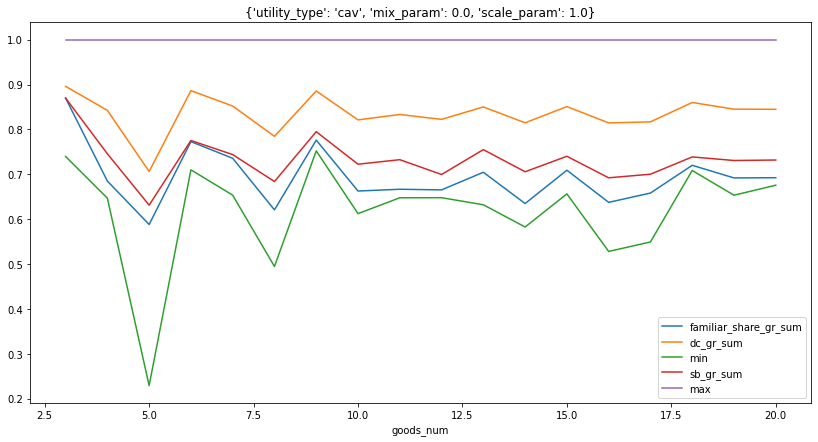

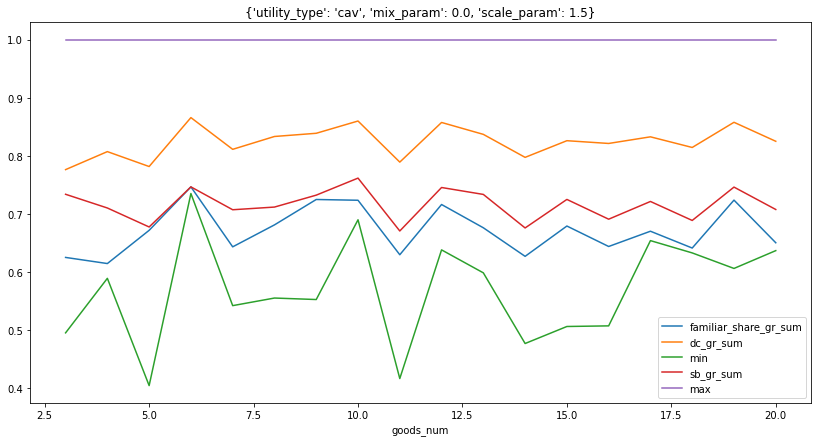

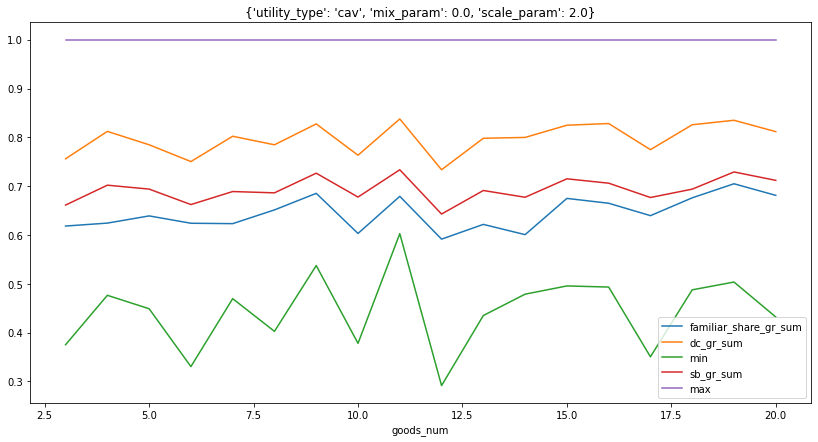

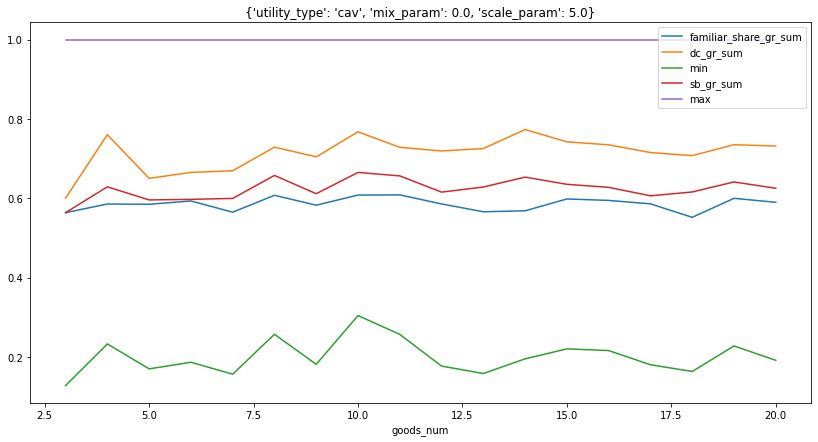

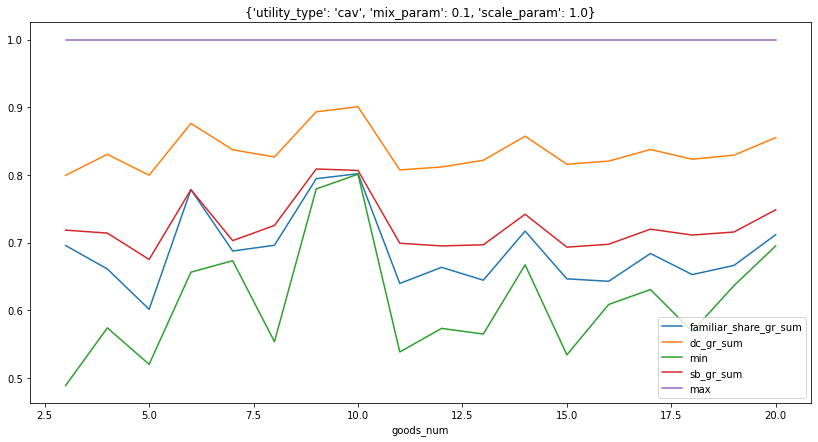

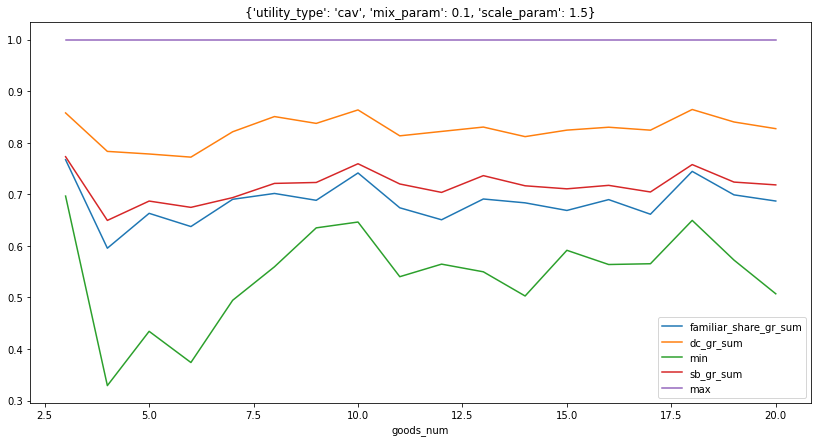

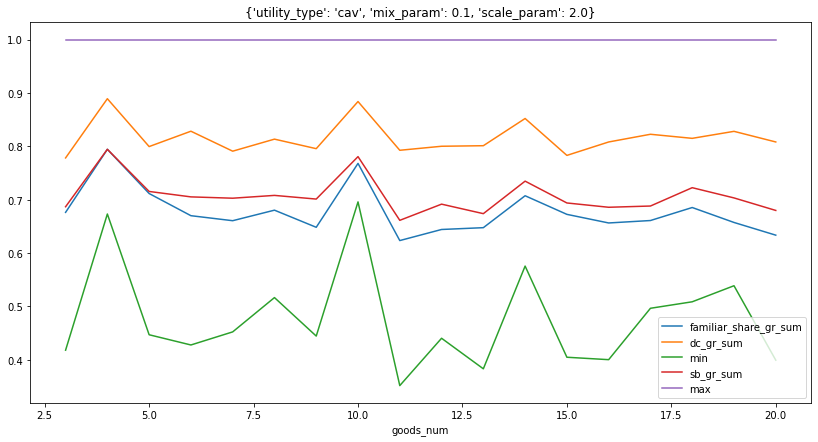

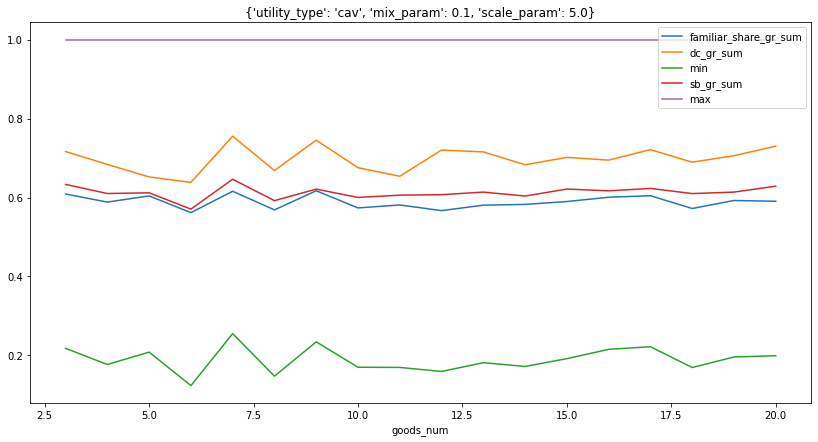

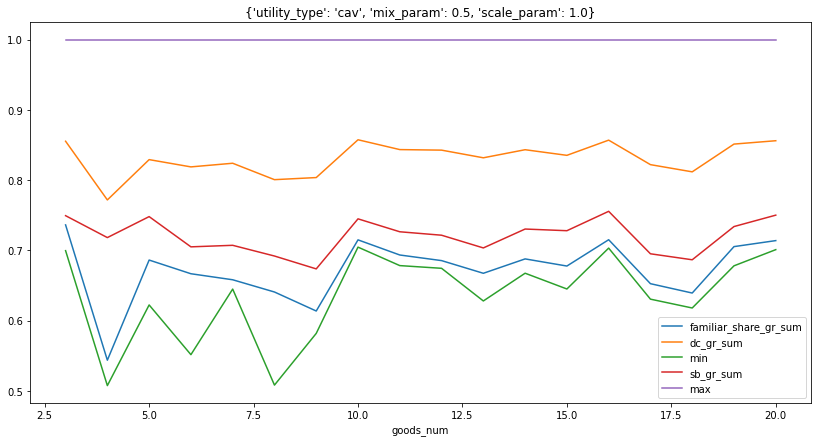

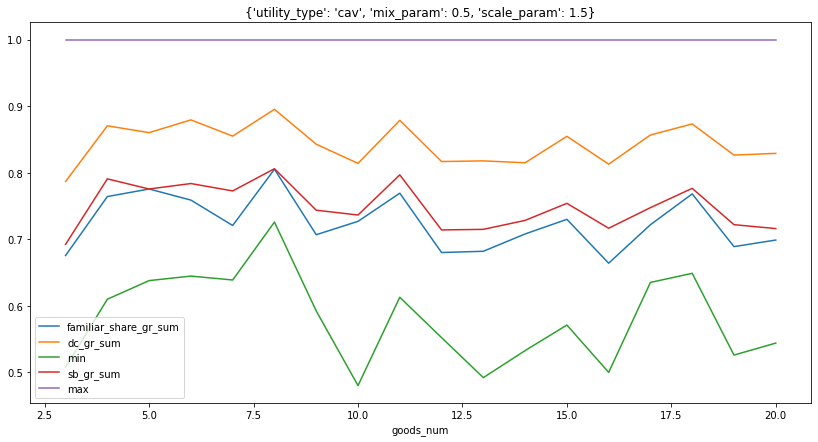

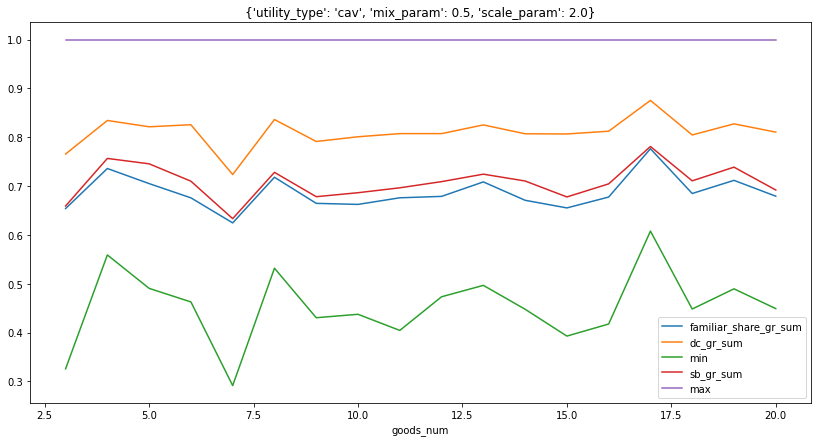

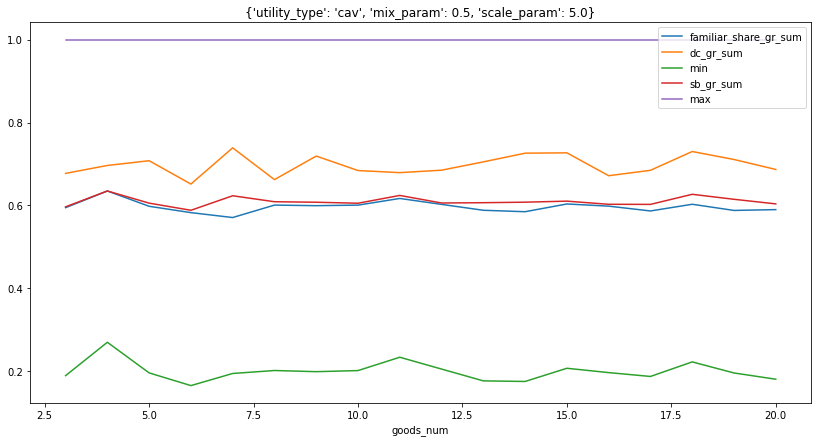

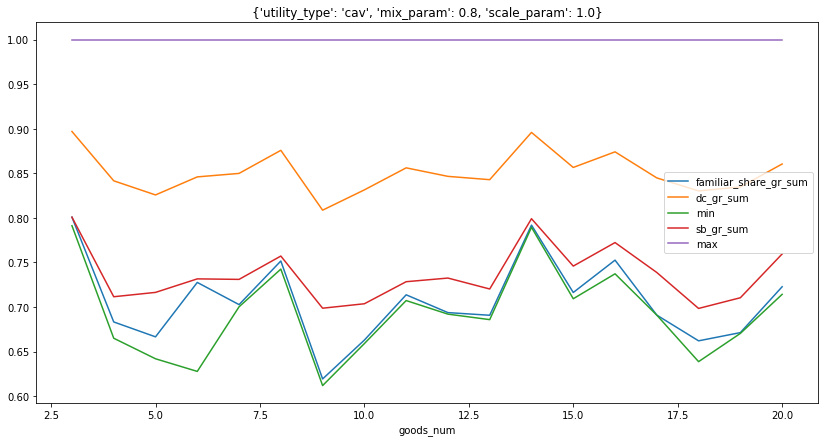

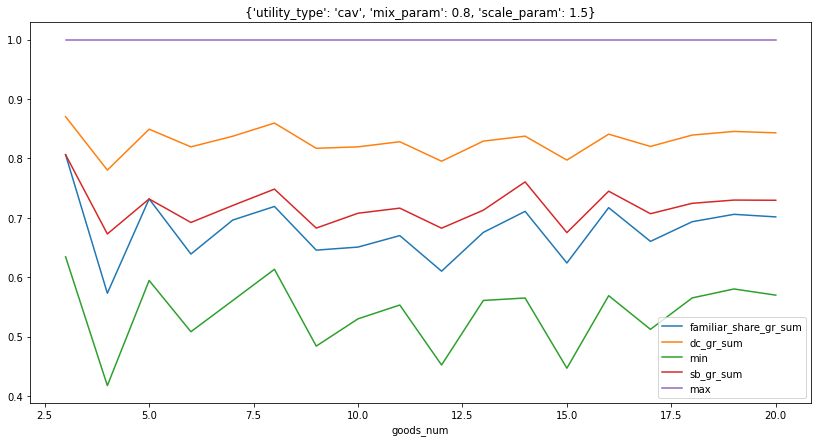

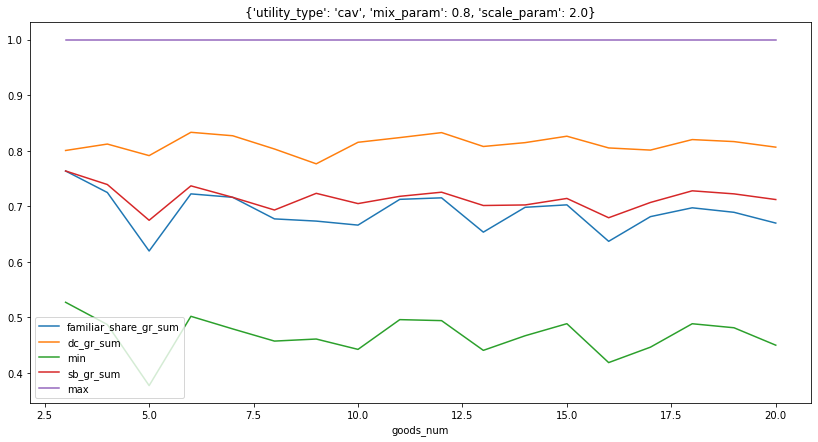

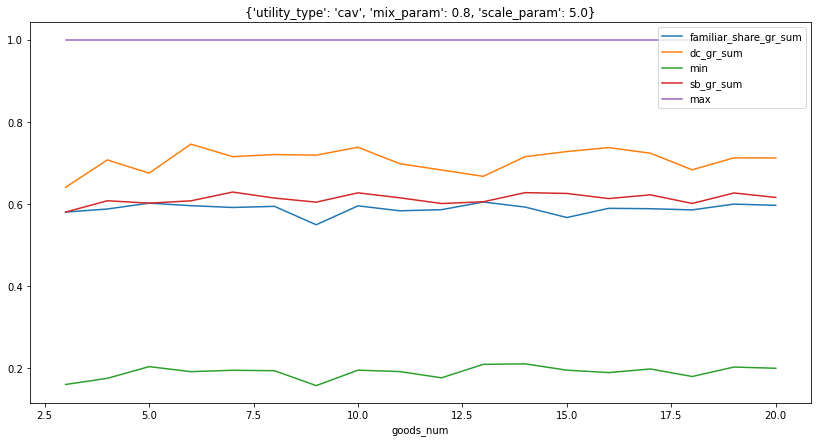

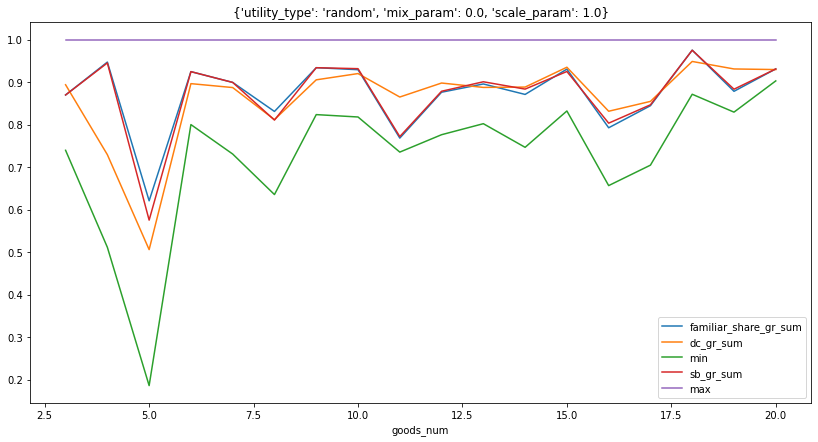

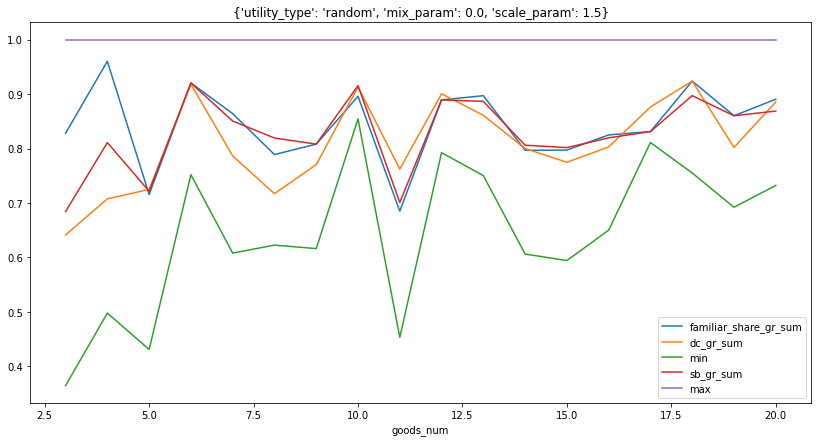

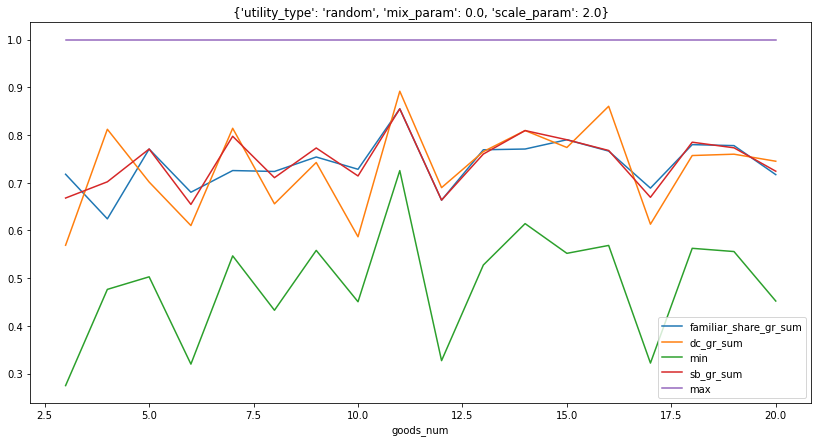

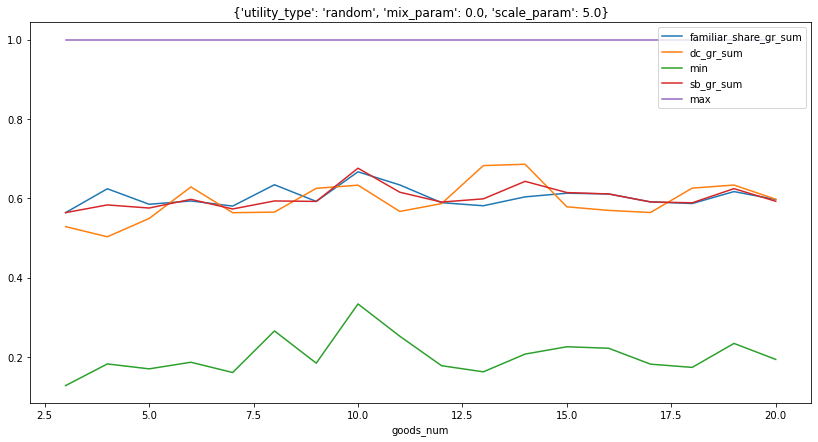

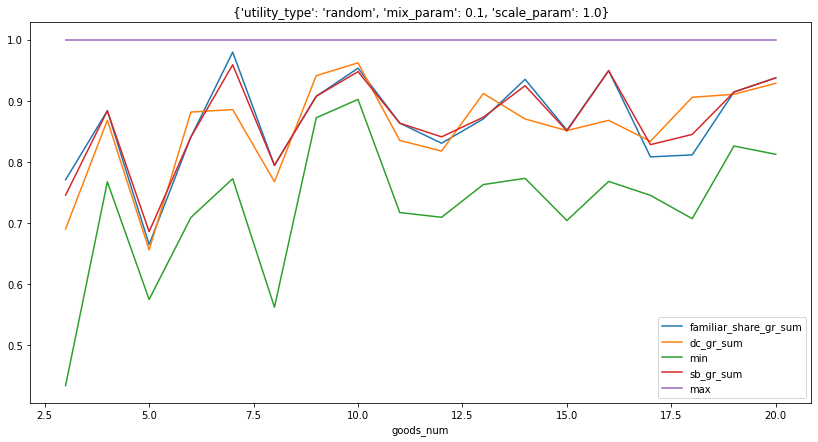

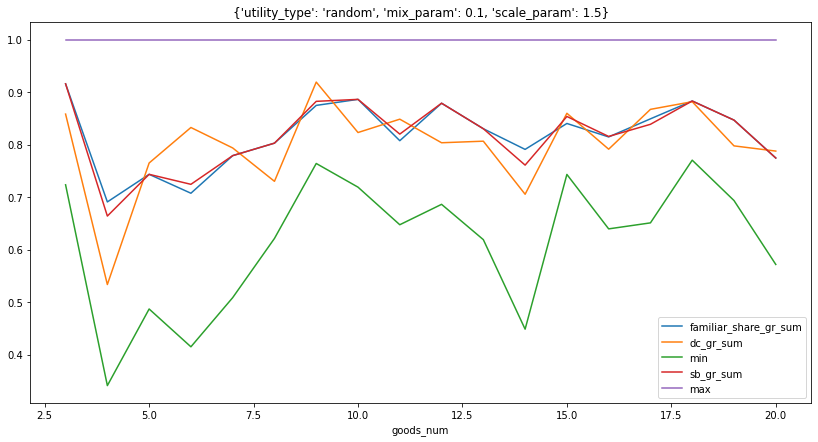

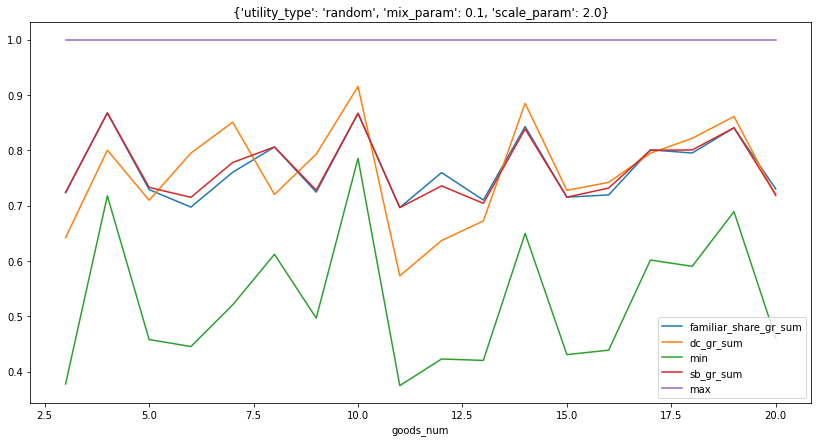

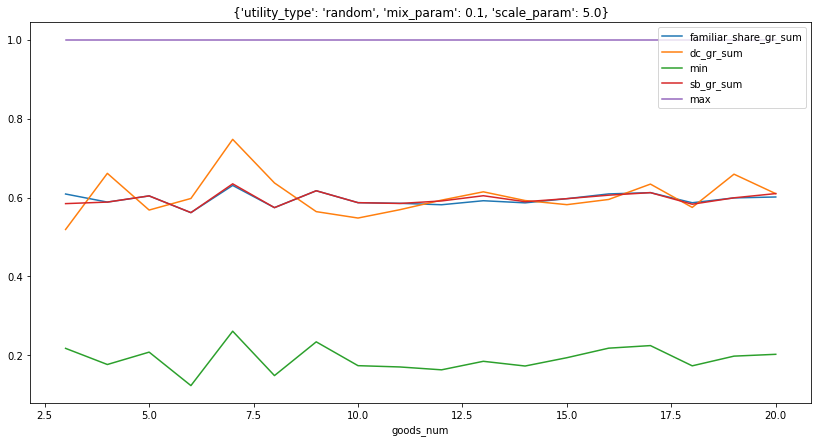

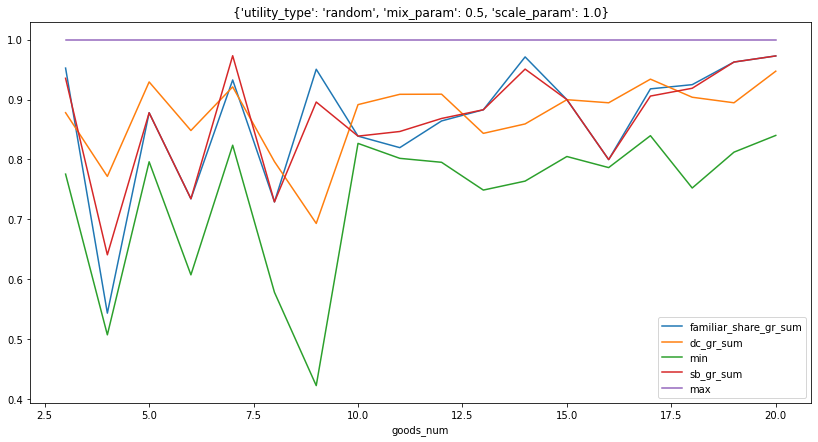

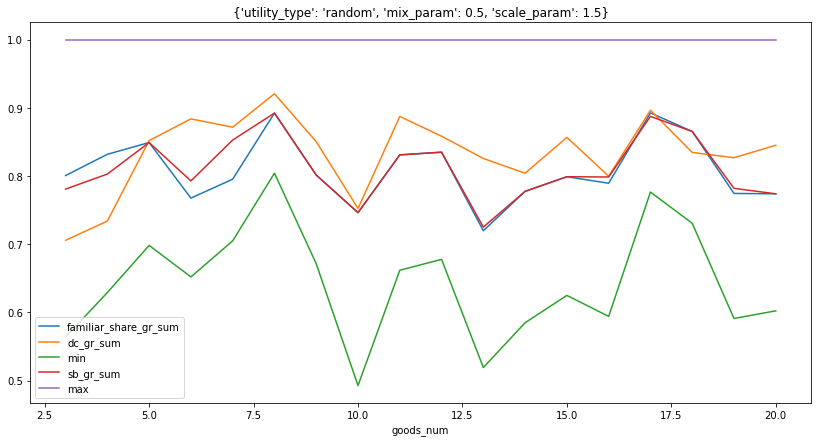

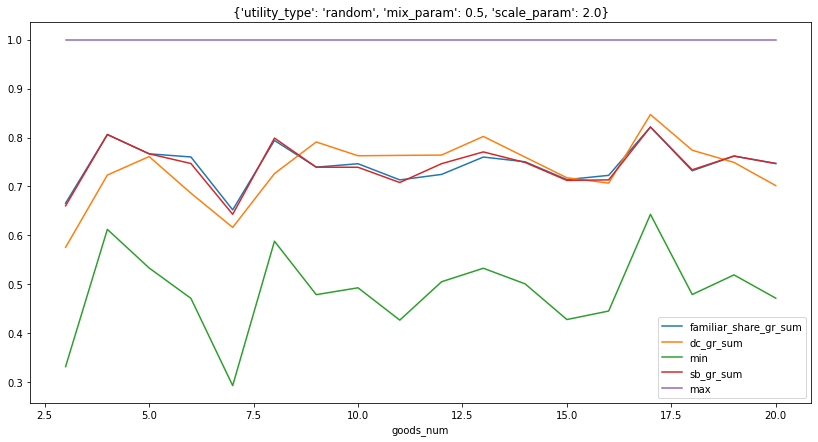

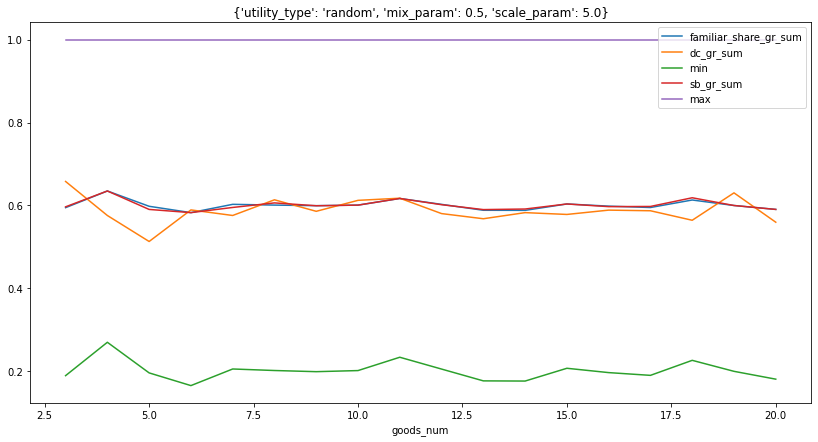

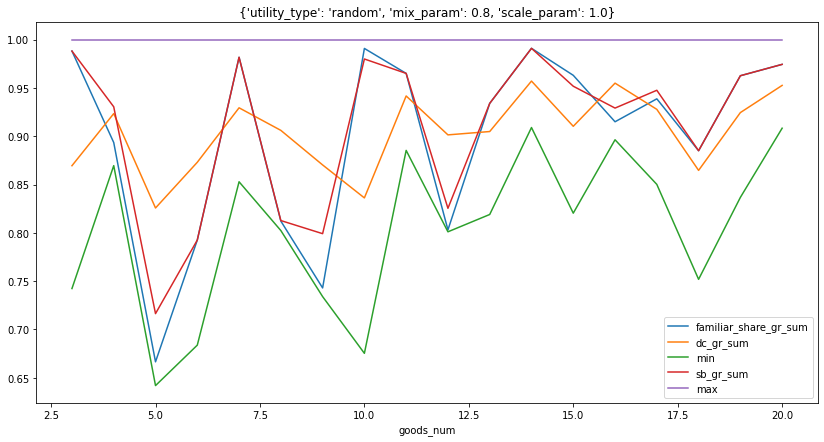

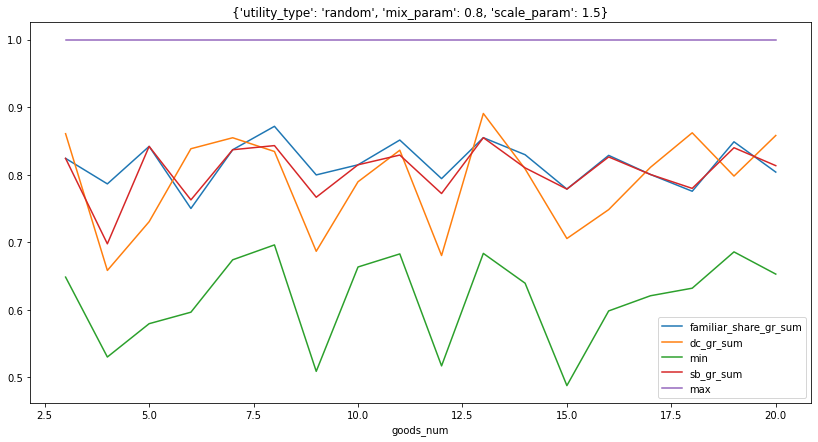

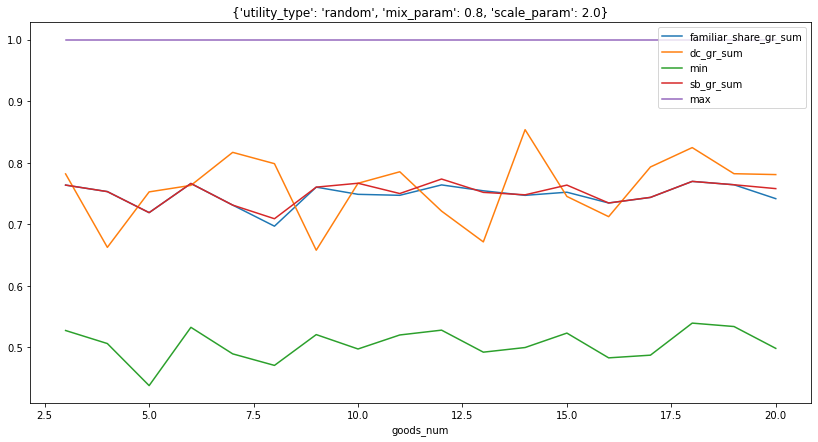

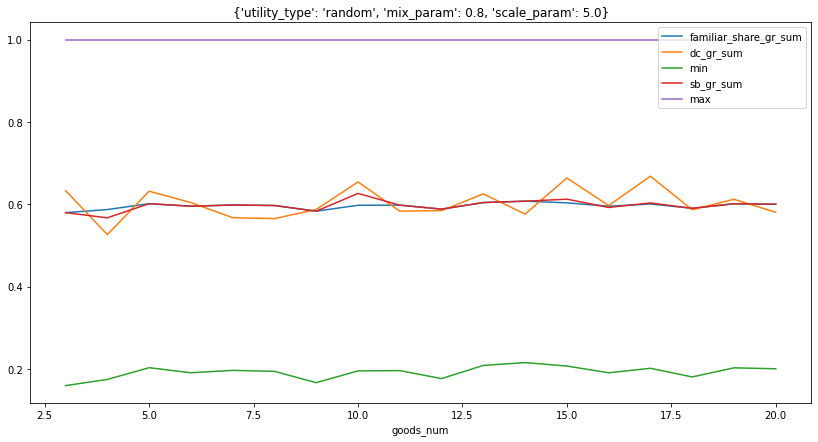

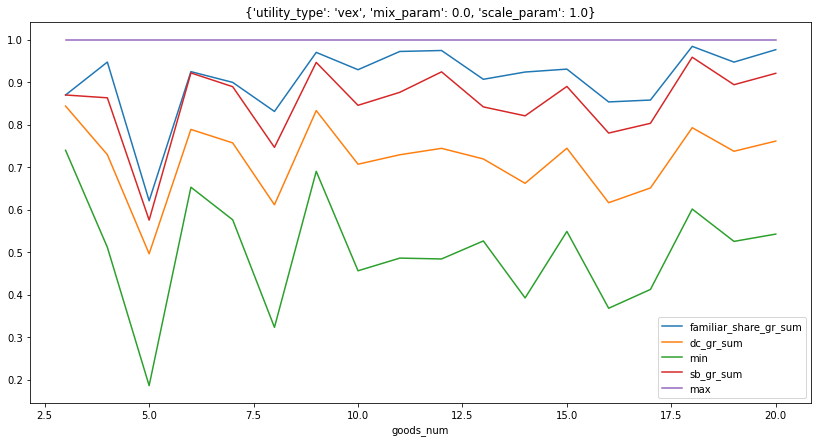

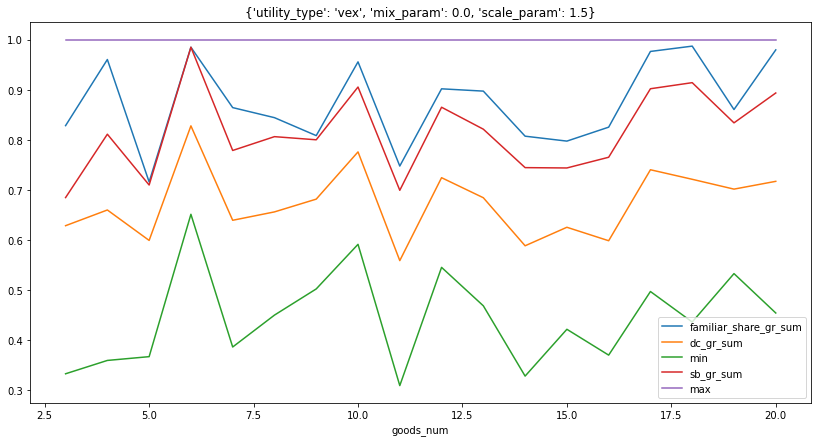

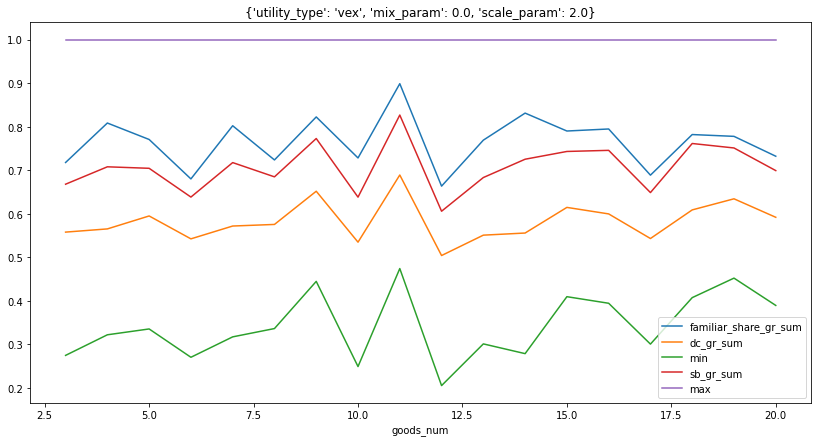

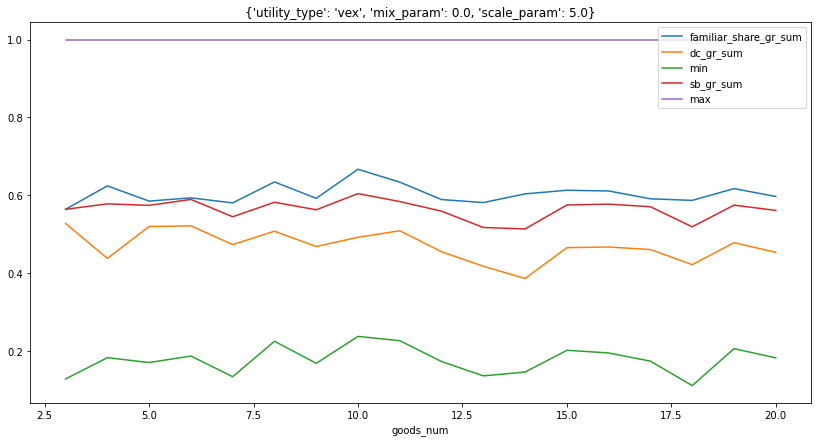

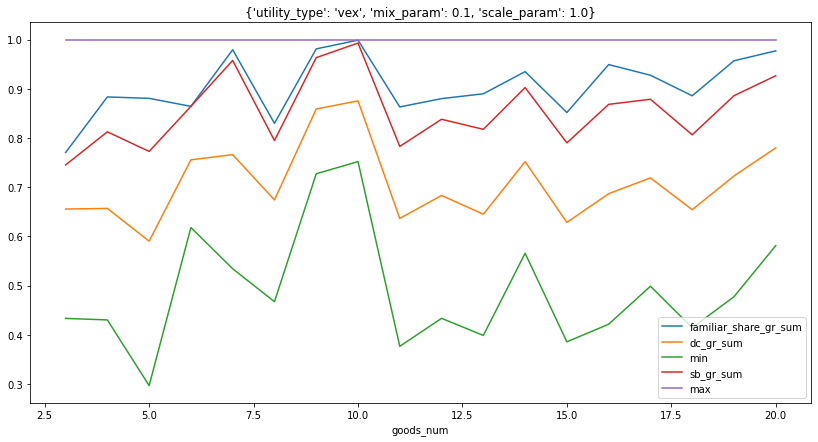

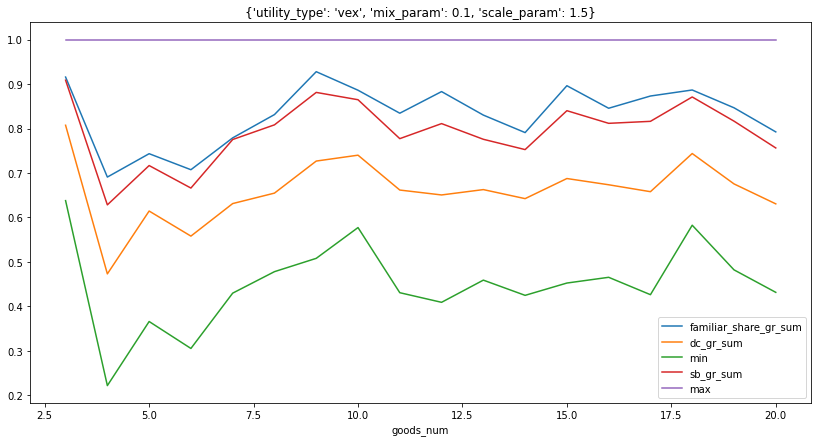

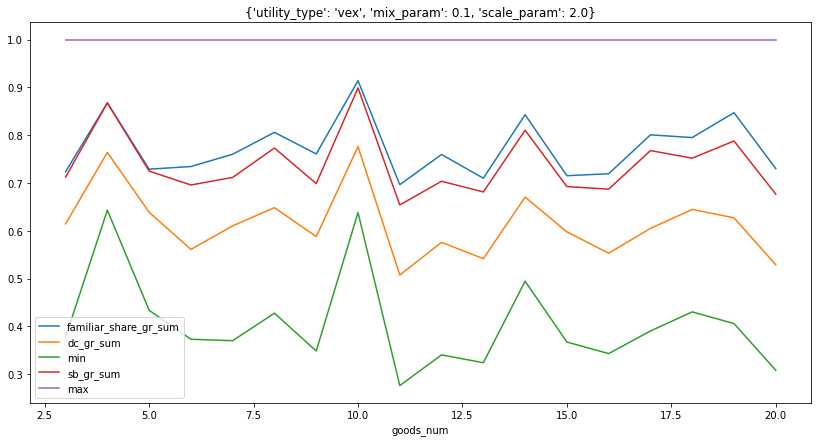

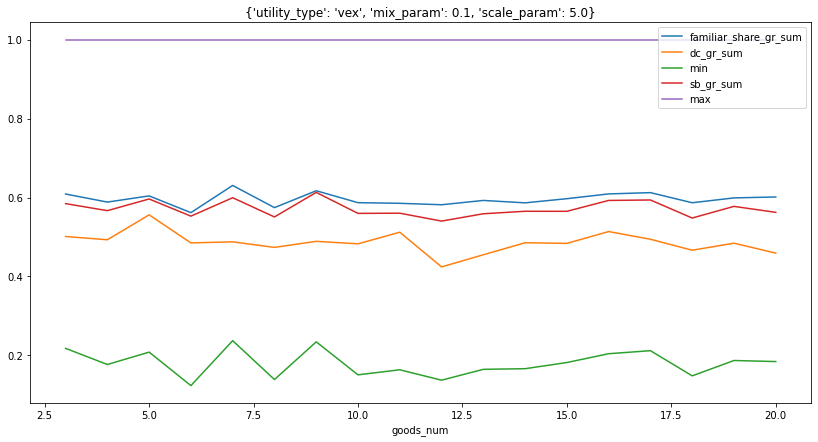

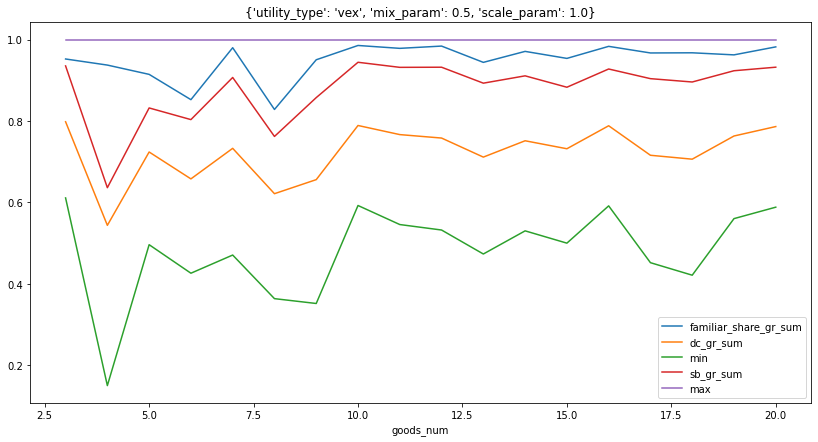

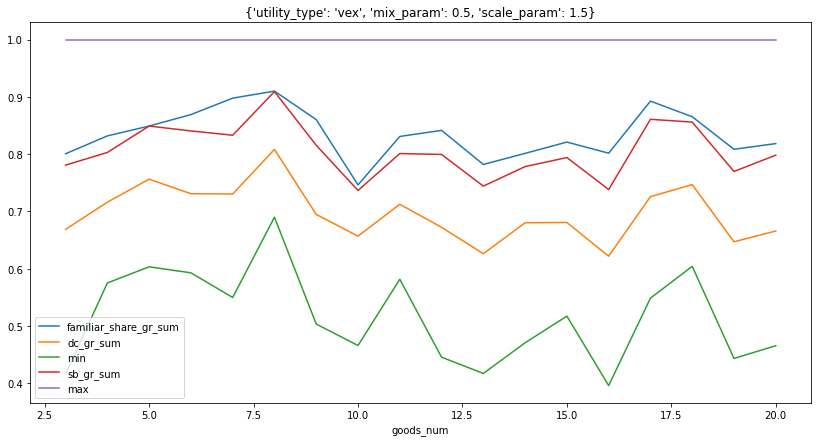

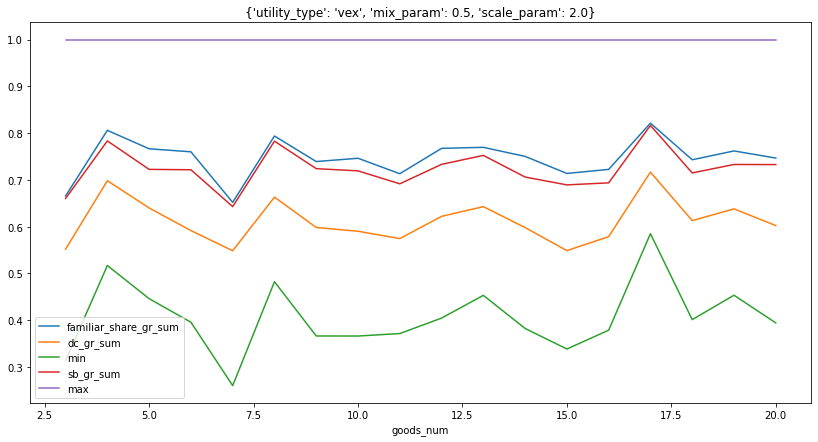

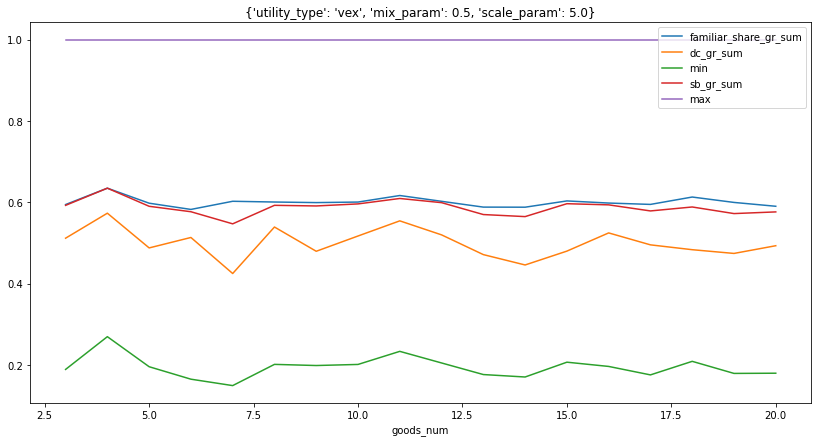

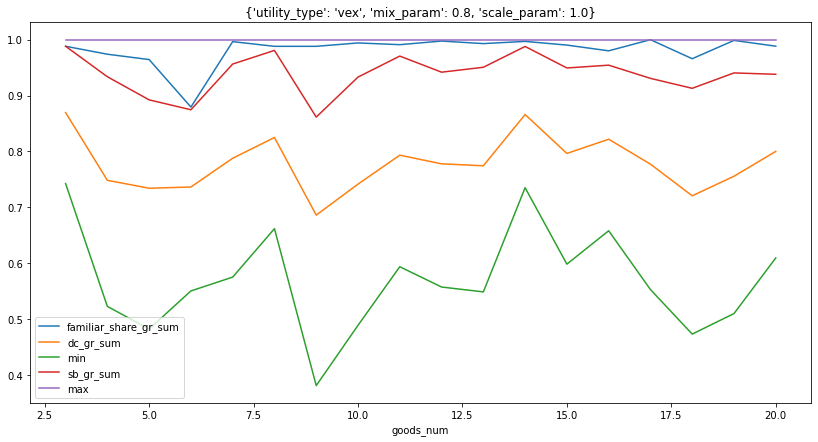

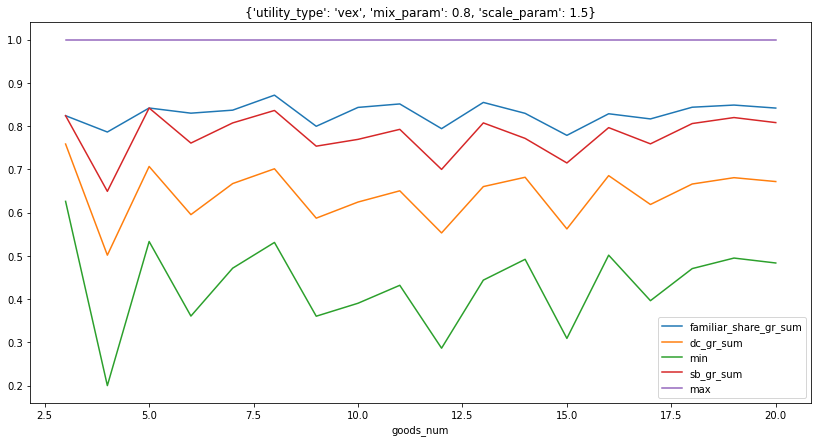

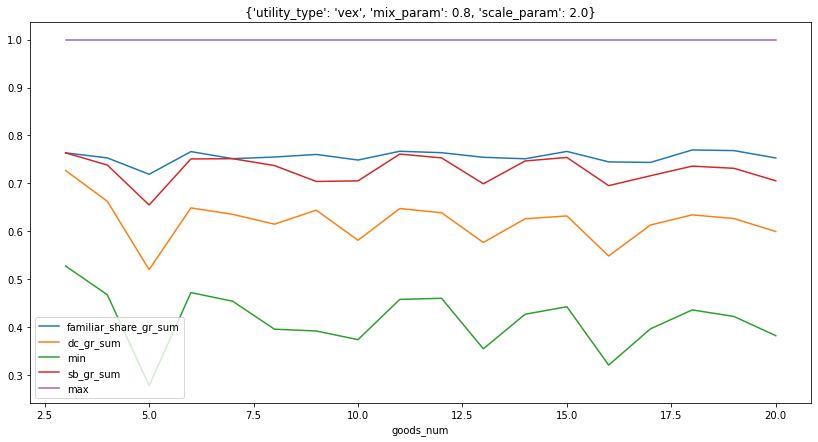

In [54]:
bargaining_gap_plot(bg_data)

In [45]:
sum_guarantees_columns = [
    'dc_gr_sum',
    'familiar_share_gr_sum',
    'max',
    'min',
    'sb_gr_sum',
]
bg_data[bg_data['max'].round(PRECISION) < bg_data[sum_guarantees_columns].max(axis=1).round(PRECISION)]

Empty DataFrame
Columns: [goods_num, familiar_share_gr_sum, dc_gr_sum, mix_param, min, utility_type, scale_param, sb_gr_sum, max]
Index: []

In [46]:
bg_data[bg_data['min'].round(PRECISION) > bg_data[sum_guarantees_columns].min(axis=1).round(PRECISION)]

Empty DataFrame
Columns: [goods_num, familiar_share_gr_sum, dc_gr_sum, mix_param, min, utility_type, scale_param, sb_gr_sum, max]
Index: []

all sum guarantees lies between min and max

### Calculate ratios statistics

In [47]:
bg_ratios = calc_raios(
    bg_data, 
    ('dc_gr_sum','familiar_share_gr_sum', 'sb_gr_sum'), 
    sum_guarantees_columns,
    bg_group_cols
)

In [ ]:
with pd.option_context('display.max_rows', None,):
    display(bg_ratios.groupby(list(bg_group_cols)).mean())

In [49]:
with pd.option_context('display.max_rows', None,):
    display(bg_ratios.groupby(list(bg_group_cols)).var())

dc_gr_sum/familiar_share_gr_sum  \
mix_param goods_num utility_type scale_param                                    
0.0       3         cav          1.0                                 0.003296   
                                 1.5                                 0.003618   
                                 2.0                                 0.003895   
                                 5.0                                 0.005556   
                    random       1.0                                 0.011186   
                                 1.5                                 0.012677   
                                 2.0                                 0.010783   
                                 5.0                                 0.013077   
                    vex          1.0                                 0.003296   
                                 1.5                                 0.003618   
                                 2.0                                 0.003895   
                                 5.0                                 0.005556   
          4         cav          1.0                                 0.004487   
                                 1.5                                 0.004440   
                                 2.0                                 0.004470   
                                 5.0                                 0.005974   
                    random       1.0                                 0.015903   
                                 1.5                                 0.012342   
                                 2.0                                 0.012810   
                                 5.0                                 0.019414   
                    vex          1.0                                 0.004487   
                                 1.5                                 0.004440   
                                 2.0                                 0.004470   
                                 5.0                                 0.005974   
          5         cav          1.0                                 0.003628   
                                 1.5                                 0.003791   
                                 2.0                                 0.004066   
                                 5.0                                 0.004697   
                    random       1.0                                 0.007117   
                                 1.5                                 0.008126   
                                 2.0                                 0.009539   
                                 5.0                                 0.009568   
                    vex          1.0                                 0.003628   
                                 1.5                                 0.003791   
                                 2.0                                 0.004066   
                                 5.0                                 0.004697   
          6         cav          1.0                                 0.002616   
                                 1.5                                 0.003674   
                                 2.0                                 0.002574   
                                 5.0                                 0.003689   
                    random       1.0                                 0.007901   
                                 1.5                                 0.008977   
                                 2.0                                 0.008747   
                                 5.0                                 0.012291   
                    vex          1.0                                 0.002616   
                                 1.5                                 0.003674   
                                 2.0                                 0.002574   
                                 5.0                                 0.003689

# 3. Bargaining gap mixed pairs

In [51]:
bgm_exp = bargaining_gap_experiment.BargainingGapMixedUtilitiesExperiment()
bgm_exp.set_params(
    {
        'scale_param': [1, 5],  # lambda
        'mix_param': [0, 0.8],  # epsilon
    }
)
bgm_exp.run_and_save(NUMBER_OF_EXPERIMENTS)
bgm_exp.columns

{'dc_gr_sum',
 'familiar_share_gr_sum',
 'goods_num',
 'max',
 'min',
 'mix_param',
 'sb_gr_sum',
 'scale_param',
 'utility_type'}

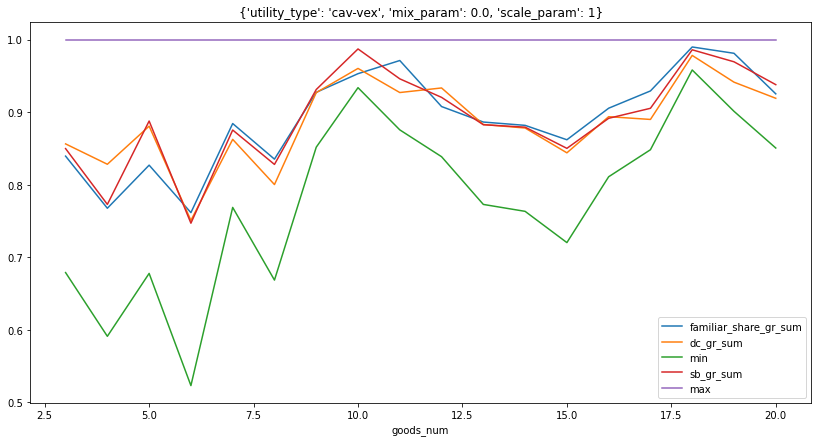

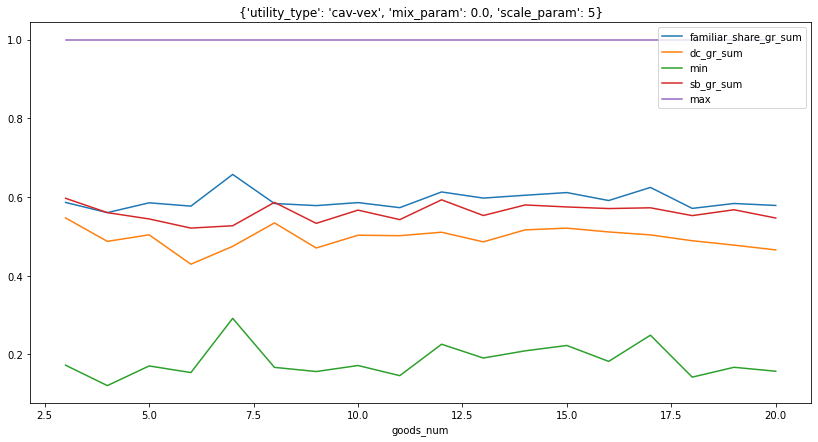

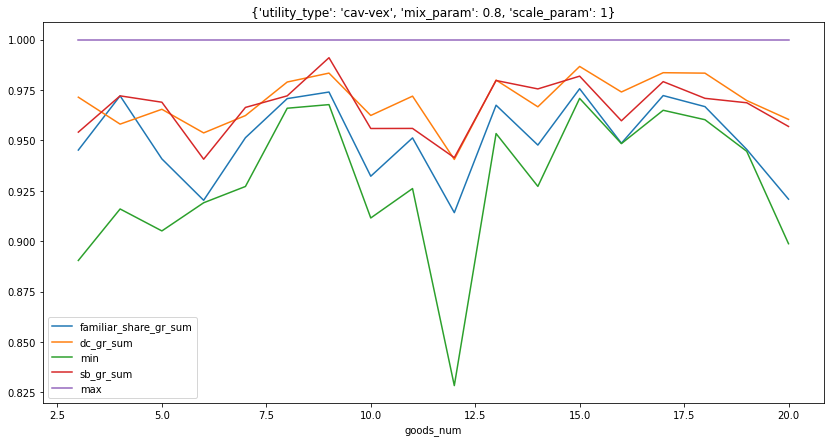

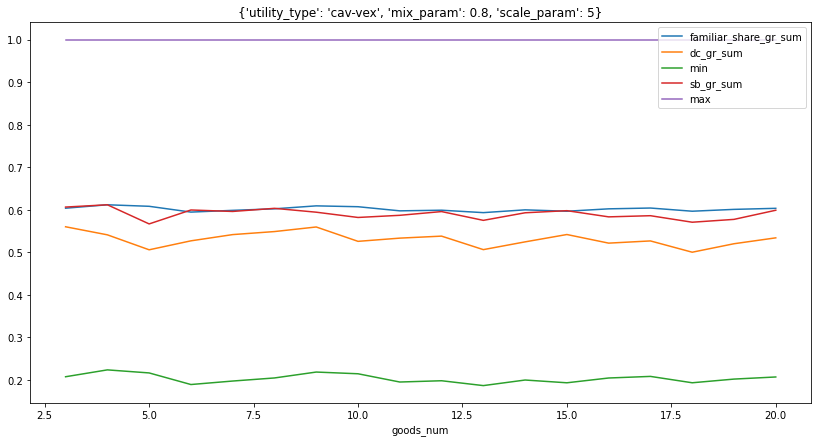

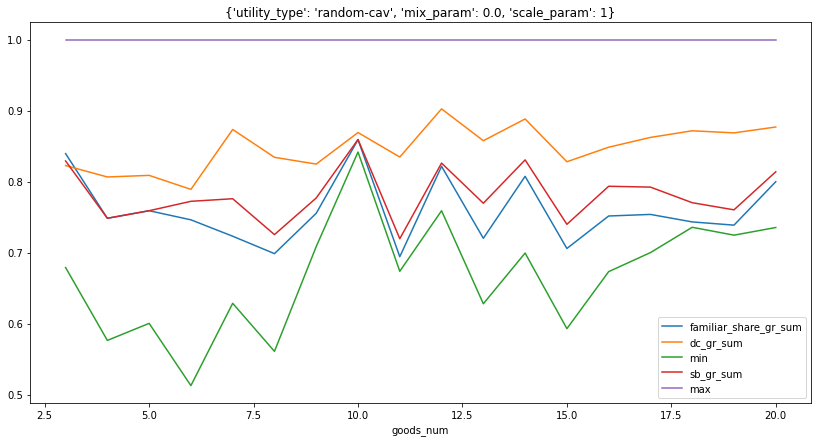

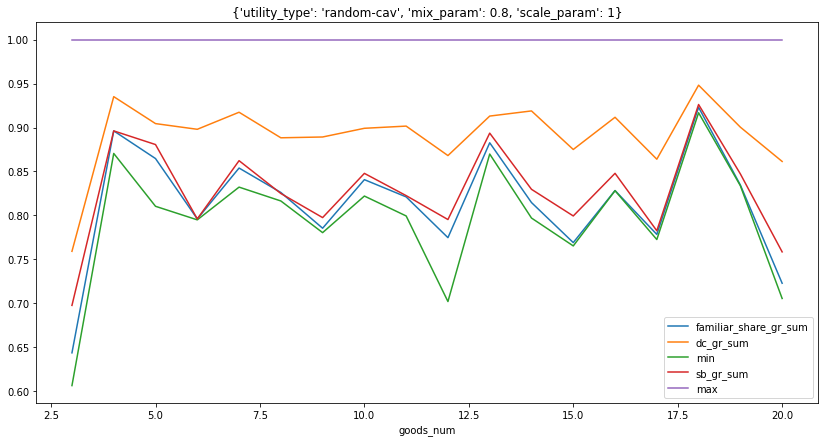

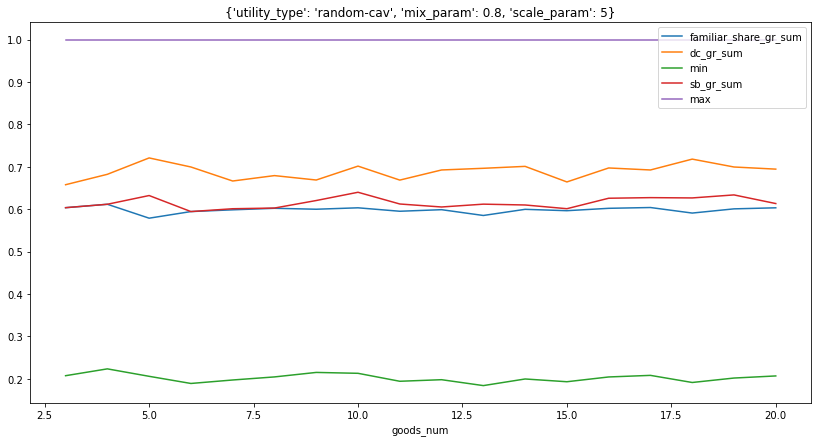

In [56]:
bgm_data = bgm_exp.load_experiment()
bargaining_gap_plot(bgm_data)

In [59]:
ts_exp = total_surplus_experiment.TotalSurplusExperiment()
ts_exp.set_params(
    {
        'scale_param': [1, 5],  # lambda
        'mix_param': [0, 0.8],  # epsilon
    }
)
ts_exp.run_and_save(NUMBER_OF_EXPERIMENTS)
ts_exp.columns

{'dc1_total_surplus',
 'dc2_total_surplus',
 'goods_num',
 'max',
 'max_utility',
 'min',
 'mix_param',
 'sb_total_surplus',
 'scale_param',
 'utility_type'}

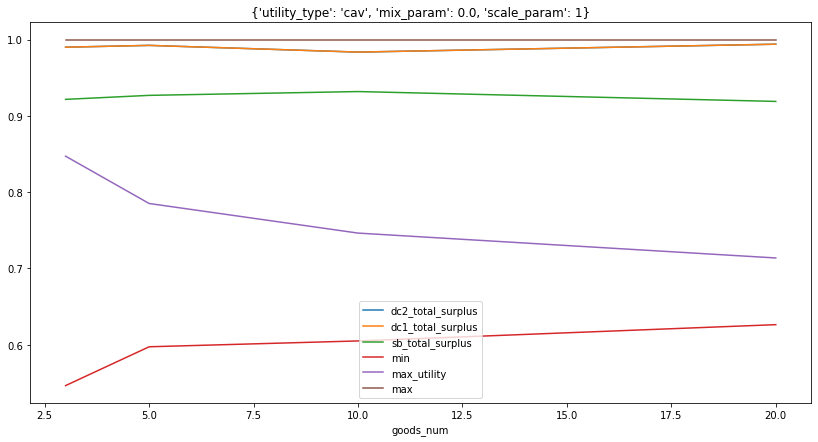

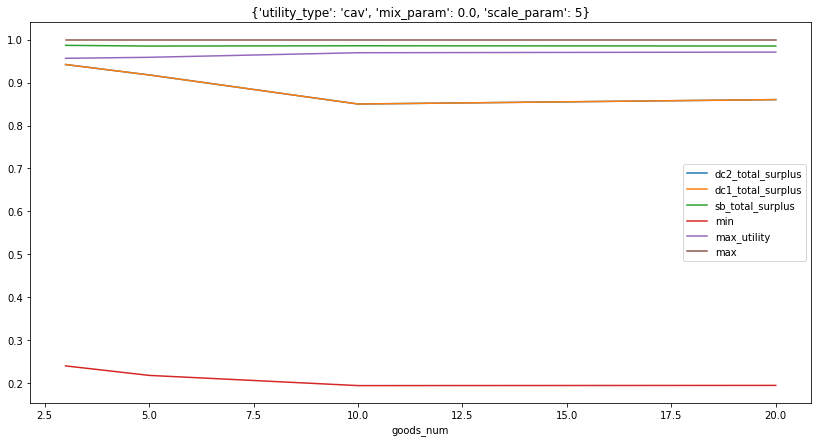

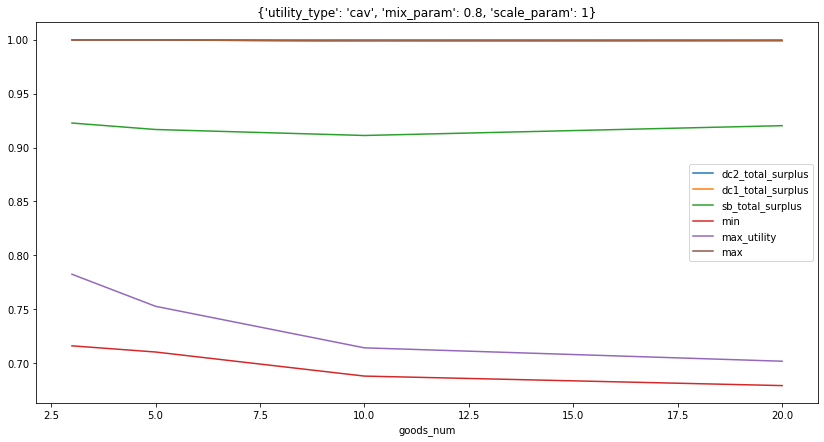

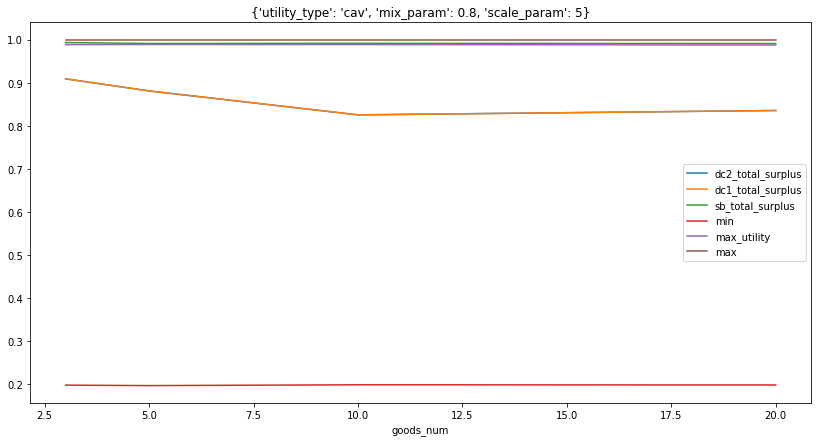

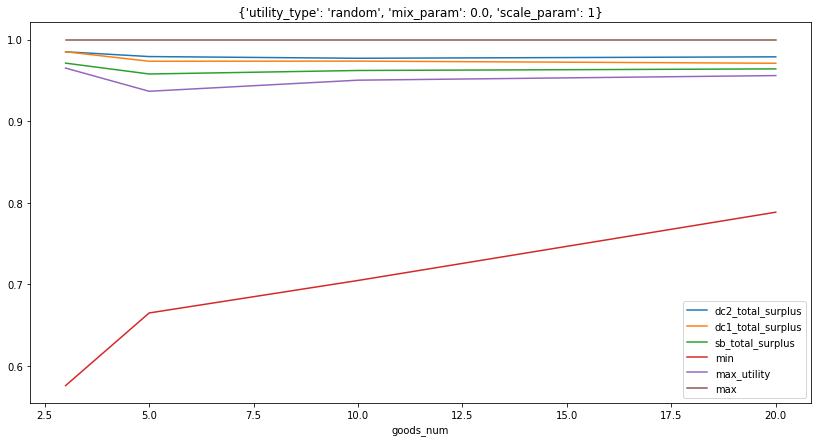

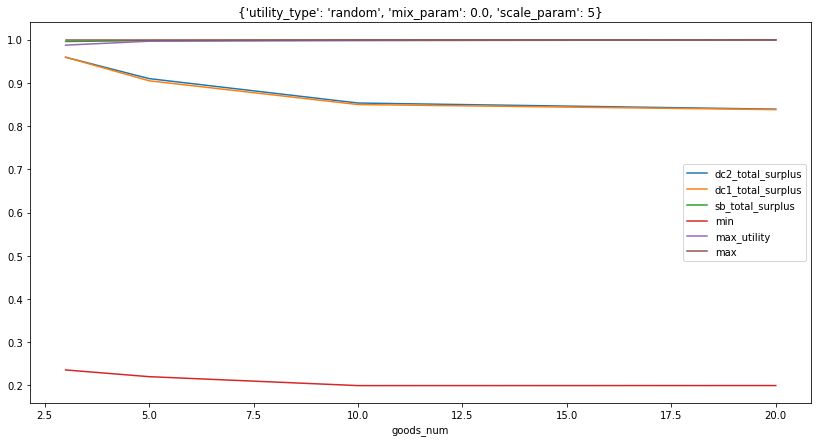

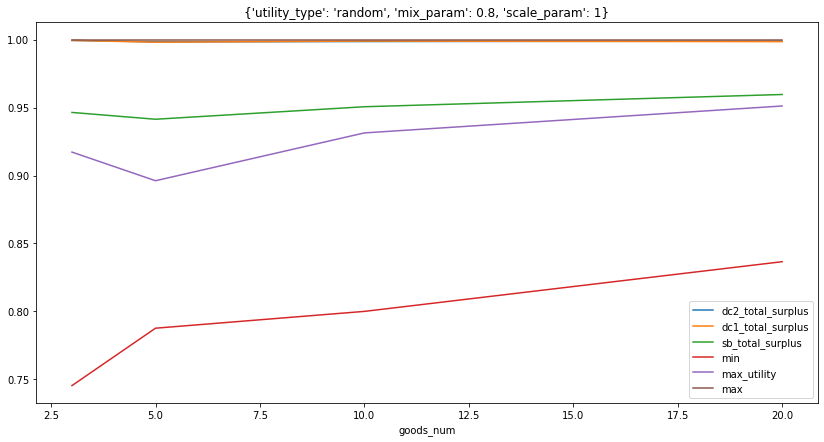

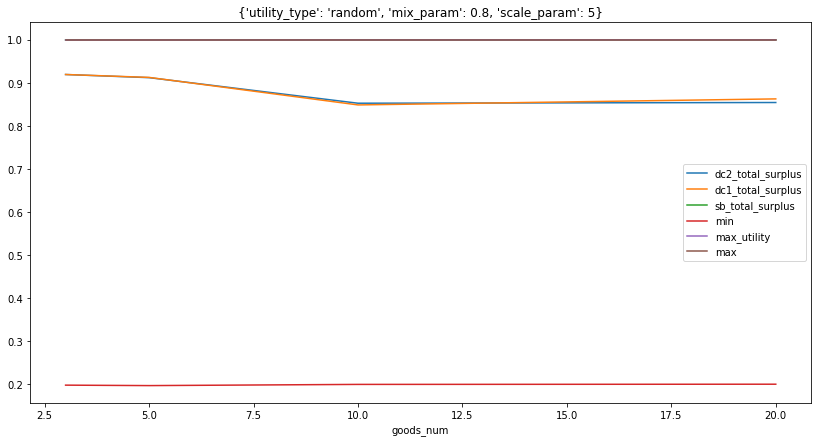

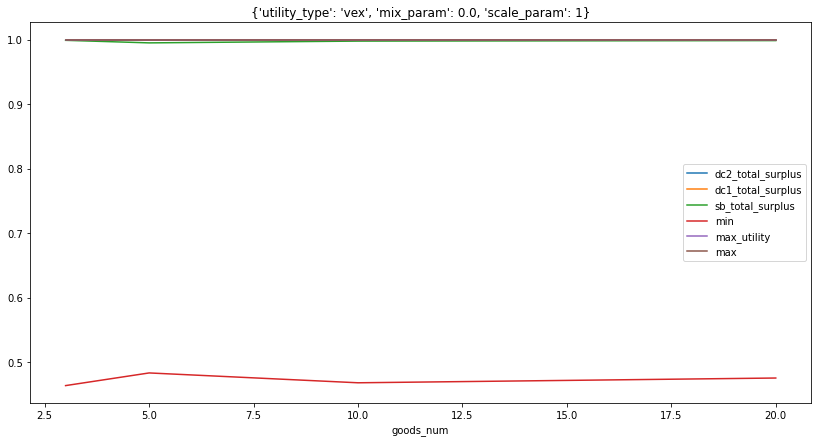

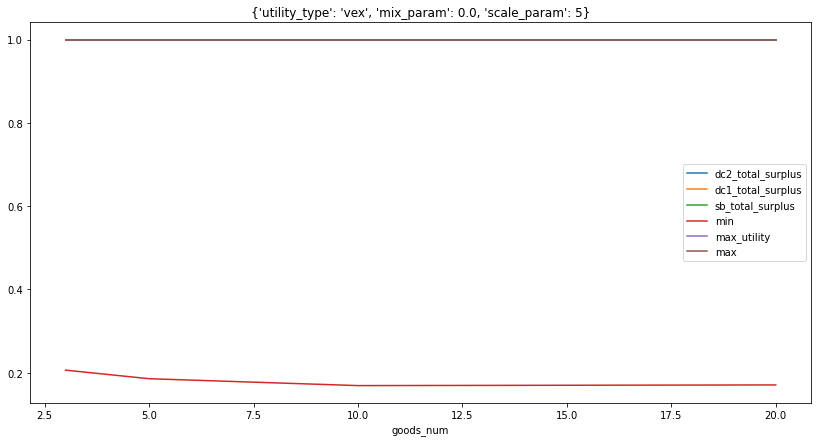

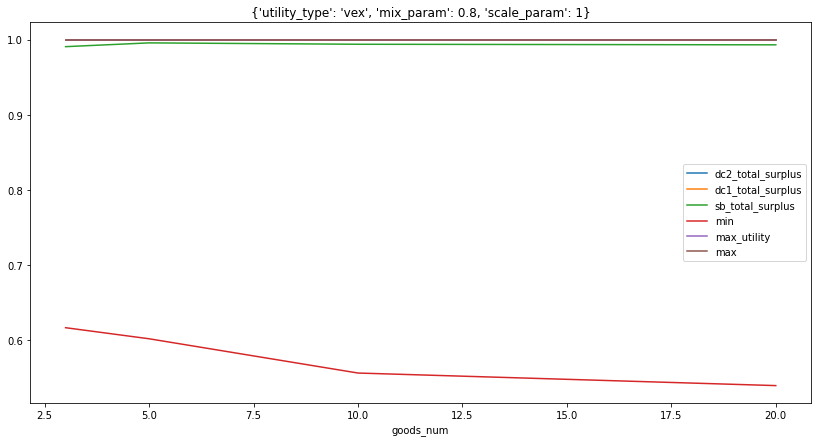

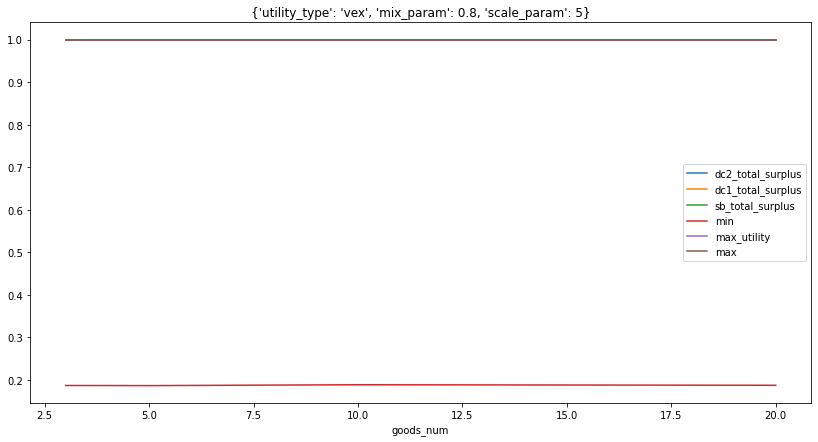

In [67]:
ts_data = ts_exp.load_experiment()
ts_r_data = ts_data.groupby(['utility_type', 'mix_param', 'scale_param', 'goods_num']).mean()
for i in ts_r_data.index.droplevel('goods_num').unique():
    (
        ts_r_data
        .loc[(*i, slice(None))]
        .droplevel(['utility_type', 'mix_param', 'scale_param'])
        .plot(
            figsize=(14, 7), 
            title=str(dict(zip(bg_r_data.index.names[:3], i))), 
            style='-'
        )
    )